In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.shape

(891, 12)

In [59]:
df.duplicated().sum()

0

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
c=0
for i in df['Survived']:
    if i==0:
        c+=1;

print('Survived',c)

Survived 549


In [65]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

C → Cherbourg, France

Q → Queenstown (Cobh), Ireland

S → Southampton, England

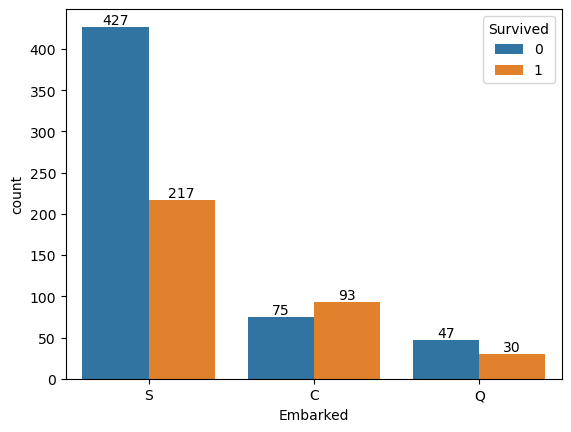

In [66]:
ax=sns.countplot(x='Embarked',data=df,hue='Survived')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show() 

out of 644 people in S i.e, Southampton, England 427 people died and 217 people survived , out of 168 people from C i.e, Cherbourg, France 75 died and 93 survived and out of 77 people from Q i.e, Queenstown (Cobh), Ireland 47 died and 30 survived

In [67]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

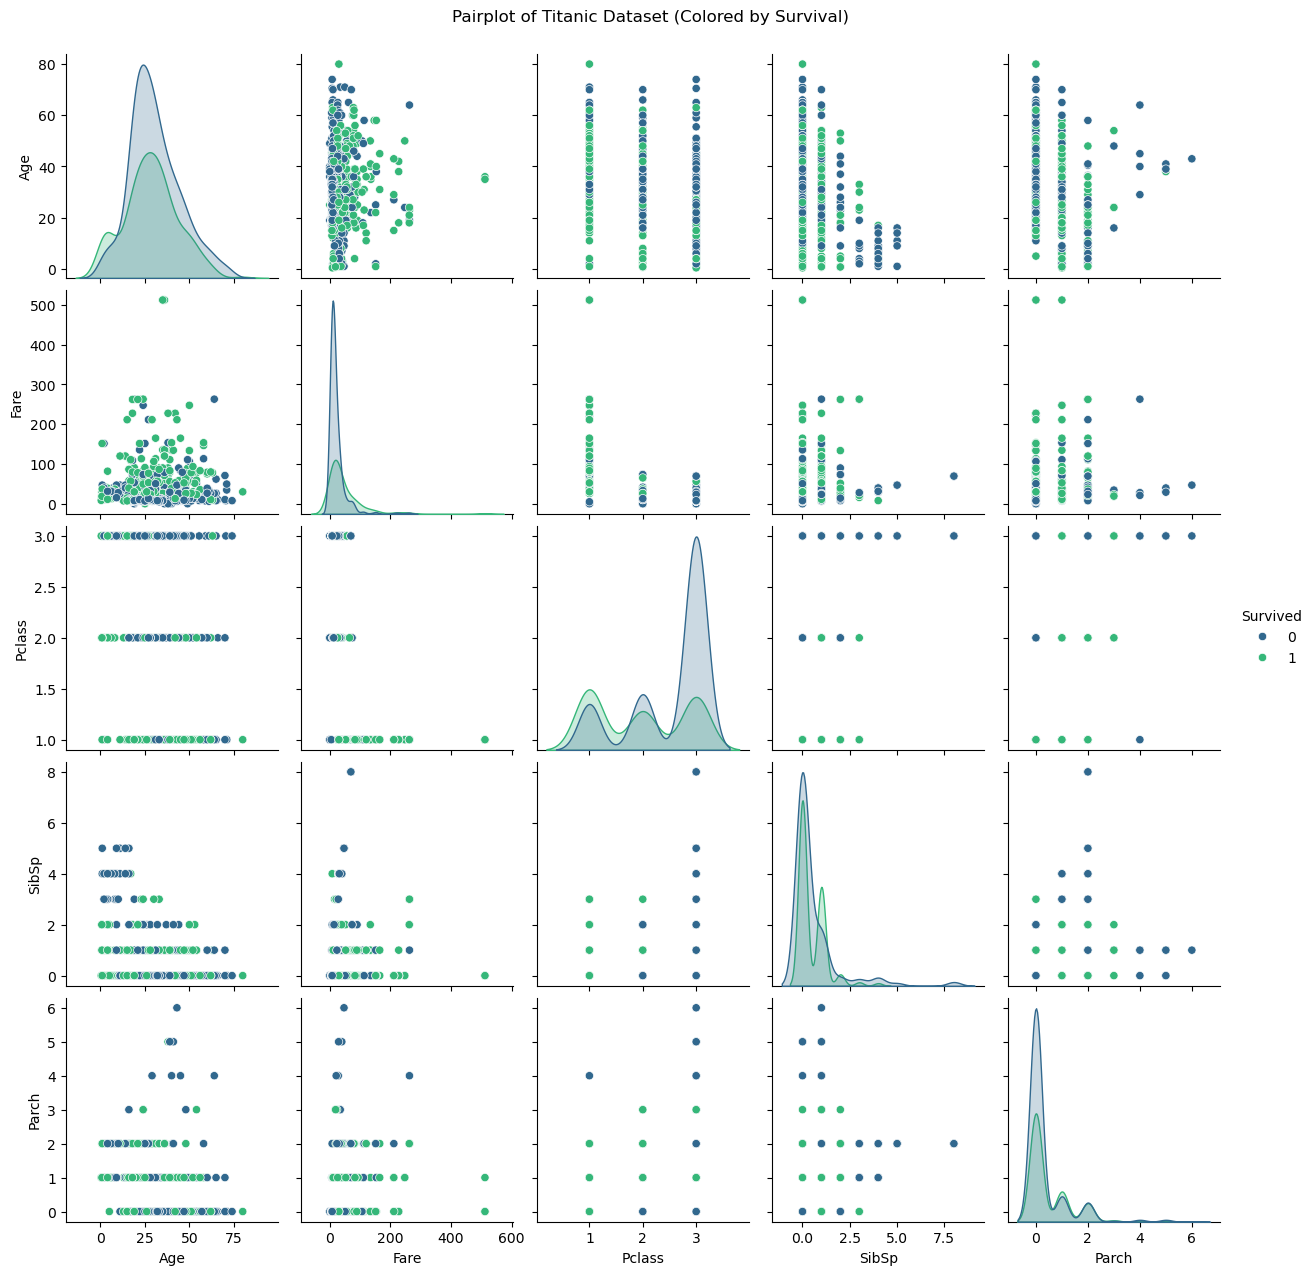

In [68]:
num_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']
sns.pairplot(df[num_cols], hue='Survived', palette='viridis')
plt.suptitle('Pairplot of Titanic Dataset (Colored by Survival)', y=1.02)
plt.show()

The sns.pairplot() reveals that survivors tended to be younger, paid higher fares, and were more likely in Pclass 1, while Pclass 3 passengers had lower survival rates. Families with children (higher SibSp/Parch) also showed better survival odds.

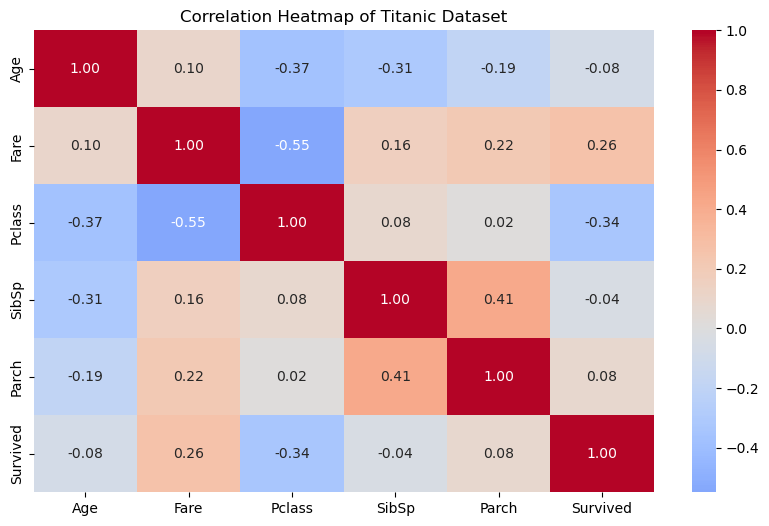

In [70]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

The sns.heatmap() confirms Fare and Pclass have the strongest correlations with survival (0.26 and -0.34, respectively), while Age had a weak negative link (-0.08). A quick sns.barplot() highlights the stark gender disparity: 74% of females survived vs. just 19% of males, underscoring the "women and children first" protocol.



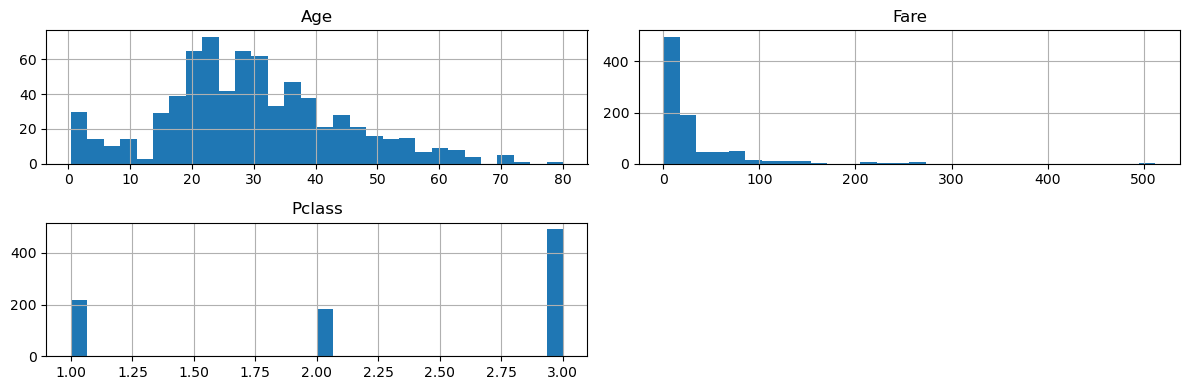

In [71]:
df[['Age', 'Fare', 'Pclass']].hist(bins=30, figsize=(12, 4))
plt.tight_layout()

<Axes: xlabel='Survived', ylabel='Age'>

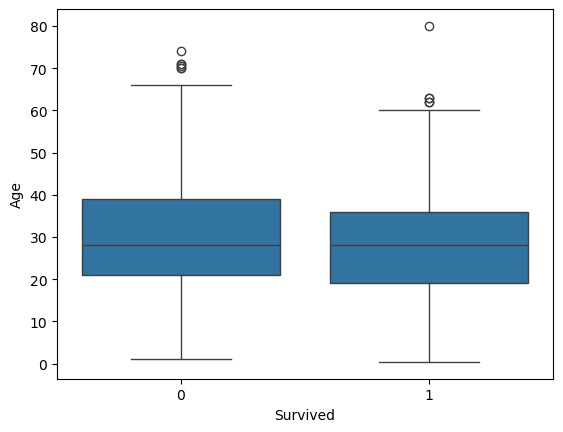

In [72]:
sns.boxplot(x='Survived', y='Age', data=df)  # Repeat for 'Fare' and 'Pclass

<Axes: xlabel='Age', ylabel='Fare'>

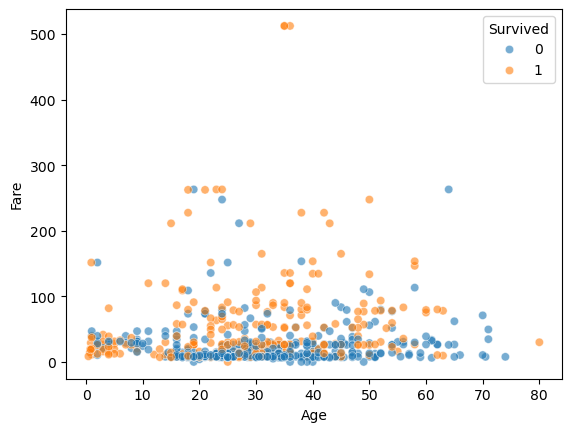

In [73]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, alpha=0.6)